In [1]:
import pandas as pd
# Load Print and play data
qrdf = pd.read_csv("data/Questionaire_Responces.csv")

# Build new database
d = {'Frequency': ['Every day', 'Once or twice a week', 'Once or twice a month', 'Once or twice a year', 'Never'],
     'responded yes to Q6': [-1,-1,-1,-1,-1],
     'responded no to Q6': [-1,-1,-1,-1,-1]}
df = pd.DataFrame(data=d)


for i in range(5):
    df['responded yes to Q6'][i] = qrdf[qrdf['Q4']==df['Frequency'][i]][qrdf['Q6']=='Yes'].count()['Q6']
    df['responded no to Q6'][i] = qrdf[qrdf['Q4']==df['Frequency'][i]][qrdf['Q6']=='No'].count()['Q6']

print(df)

               Frequency  responded yes to Q6  responded no to Q6
0              Every day                  624                   2
1   Once or twice a week                  429                   2
2  Once or twice a month                   82                   2
3   Once or twice a year                   17                   2
4                  Never                   11                   1


C:\Users\ymq56388\AppData\Local\Temp\ipykernel_32572\66067063.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['responded yes to Q6'][i] = qrdf[qrdf['Q4']==df['Frequency'][i]][qrdf['Q6']=='Yes'].count()['Q6']
C:\Users\ymq56388\AppData\Local\Temp\ipykernel_32572\66067063.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responded yes to Q6'][i] = qrdf[qrdf['Q4']==df['Frequency'][i]][qrdf['Q6']=='Yes'].count()['Q6']
C:\Users\ymq56388\AppData\Local\Temp\ipykernel_32572\66067063.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['responded no to Q6'][i] = qrdf[qrdf['Q4']==df['Frequency'][i]][qrdf['Q6']=='No'].count()['Q6']
C:\Users\ymq56388\AppData\Local\Temp\ipykernel_32572\66067063.py:14: SettingWithCopyWarning: 
A value i

In [2]:
df['Frequency'] = df['Frequency'].str.replace('twice ','twice\n')
print(df)

                Frequency  responded yes to Q6  responded no to Q6
0               Every day                  624                   2
1   Once or twice\na week                  429                   2
2  Once or twice\na month                   82                   2
3   Once or twice\na year                   17                   2
4                   Never                   11                   1


In [3]:
import math
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


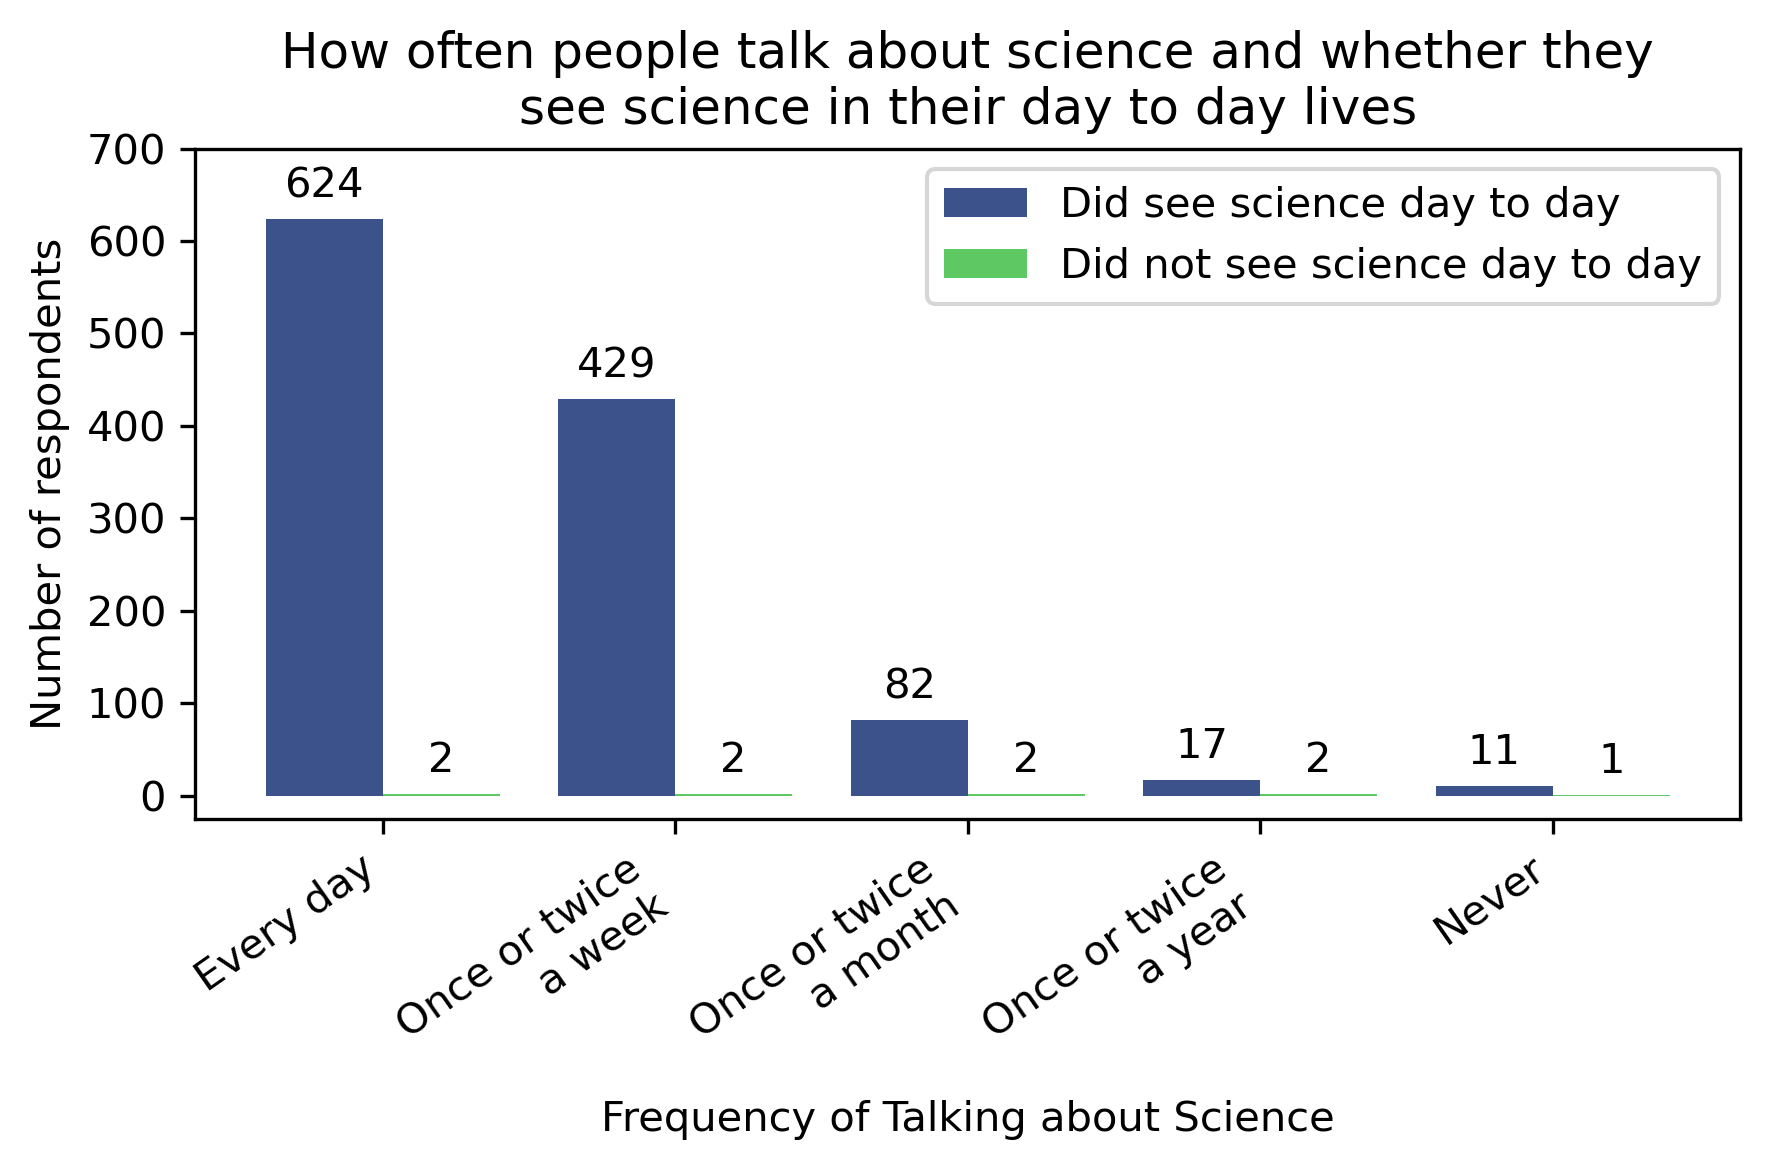

In [10]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

x = np.arange(len(df['Frequency']))  # the label locations
width = 0.40  # the width of the bars

bar1 = ax.bar(x - width/2, df['responded yes to Q6'], width=width, color=pl.cm.viridis(0.25), label='Did see science day to day')
bar2 = ax.bar(x + width/2, df['responded no to Q6'], width=width, color=pl.cm.viridis(0.75), label='Did not see science day to day')
ax.set_xlabel('Frequency of Talking about Science')
ax.set_xticks(x)
ax.set_xticklabels(df['Frequency'], rotation=35, ha='right')

ax.set_ylabel('Number of respondents')
ax.set_ylim(-25,700)
ax.set_title("How often people talk about science and whether they\nsee science in their day to day lives")

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()

#Set labeles out at the moment
autolabel(bar1)
autolabel(bar2)


#legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels)
plt.tight_layout()
plt.savefig('figures/TalkingandSeeingScience.png')
plt.show()